In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


In [57]:
#importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset

In [58]:
df=pd.read_csv('/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv' , encoding='ISO-8859-1', low_memory=False)

In [59]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176299 entries, 1 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            176299 non-null  int64  
 1   imonth           176299 non-null  int64  
 2   iday             176299 non-null  int64  
 3   country_txt      176299 non-null  object 
 4   region_txt       176299 non-null  object 
 5   provstate        176299 non-null  object 
 6   city             176299 non-null  object 
 7   latitude         176299 non-null  float64
 8   longitude        176299 non-null  float64
 9   success          176299 non-null  int64  
 10  suicide          176299 non-null  int64  
 11  attacktype1_txt  176299 non-null  object 
 12  targtype1_txt    176299 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.8+ MB


In [61]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [62]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [63]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [64]:
#filter the dataset to include only relevant columns

cols_to_keep= ['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','success','suicide','attacktype1_txt','targtype1_txt']
df=df[cols_to_keep]

In [65]:
#remove the rows with missing values

df.dropna(inplace=True)

In [66]:
#Group the datasets and calculate the attacks

attacks_by_country=df.groupby('country_txt')['iyear'].count().reset_index().sort_values('iyear', ascending=False)
attacks_by_region=df.groupby('region_txt')['iyear'].count().reset_index().sort_values('iyear', ascending=False)

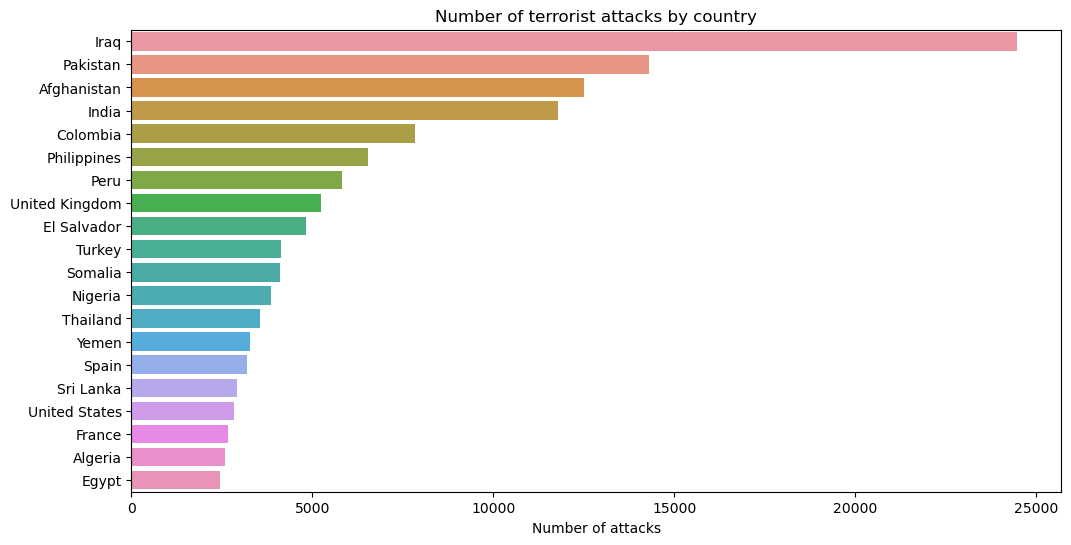

In [67]:
#Visualize the hot zone of terrorism by country and region

plt.figure(figsize=(12,6))
plt.title('Number of terrorist attacks by country')
sns.barplot(x='iyear',y='country_txt',data=attacks_by_country.head(20))
plt.xlabel('Number of attacks')
plt.ylabel('')
plt.show()

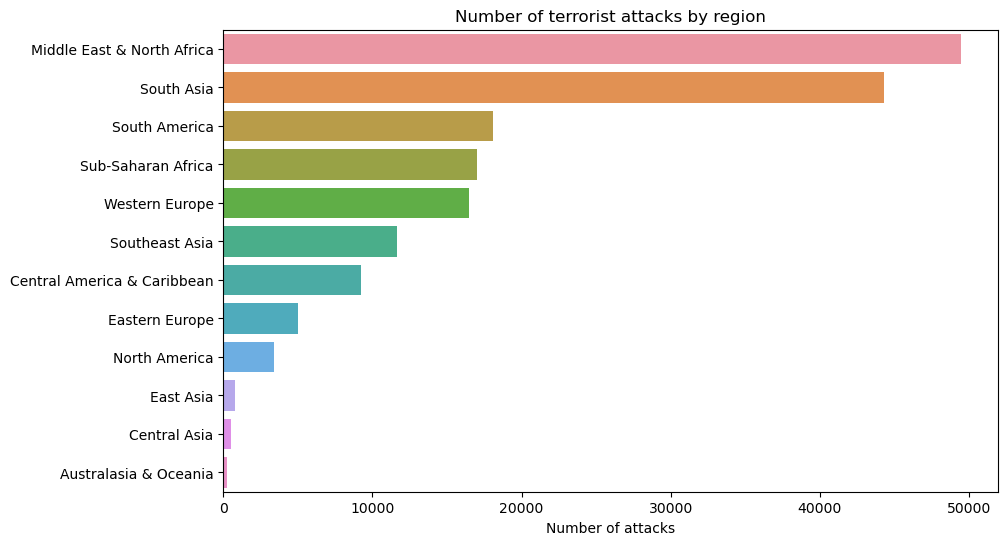

In [68]:
plt.figure(figsize=(10,6))
plt.title('Number of terrorist attacks by region')
sns.barplot(x='iyear',y='region_txt',data=attacks_by_region.head(20))
plt.xlabel('Number of attacks')
plt.ylabel('')
plt.show()

# Destructive feature of Data

In [69]:
print("Country with the most attacks:",df['country_txt'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Total no. of  suicide:",df['suicide'].value_counts().index[1])
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Unknown
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Total no. of  suicide: 1
Most Attack Types: Bombing/Explosion


/tmp/ipykernel_32/637261654.py:3: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  cities = df.country_txt.dropna(False)


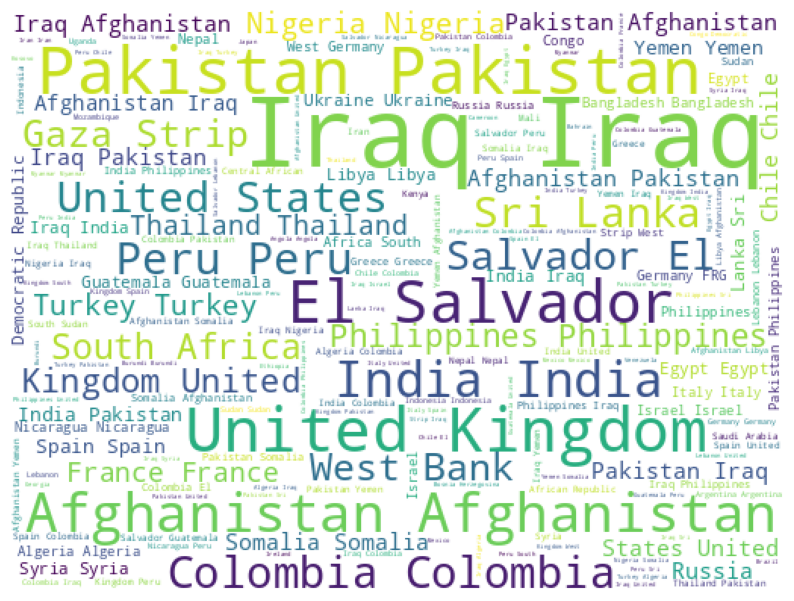

In [70]:
from wordcloud import WordCloud
from scipy import signal
cities = df.country_txt.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


In [71]:
df['iyear'].value_counts(dropna = False).sort_index()

1970      641
1971      463
1972      547
1973      464
1974      574
1975      726
1976      898
1977     1291
1978     1444
1979     2521
1980     2553
1981     2448
1982     2396
1983     2657
1984     3188
1985     2675
1986     2674
1987     2983
1988     3460
1989     4134
1990     3626
1991     4378
1992     4774
1994     3251
1995     2894
1996     2883
1997     2942
1998      891
1999     1341
2000     1772
2001     1881
2002     1310
2003     1263
2004     1136
2005     1985
2006     2660
2007     3162
2008     4668
2009     4556
2010     4754
2011     5003
2012     8470
2013    11926
2014    16794
2015    14861
2016    13530
2017    10851
Name: iyear, dtype: int64

# DATA VISUALIZATION

In [72]:
# Number of Terrorist activites each year

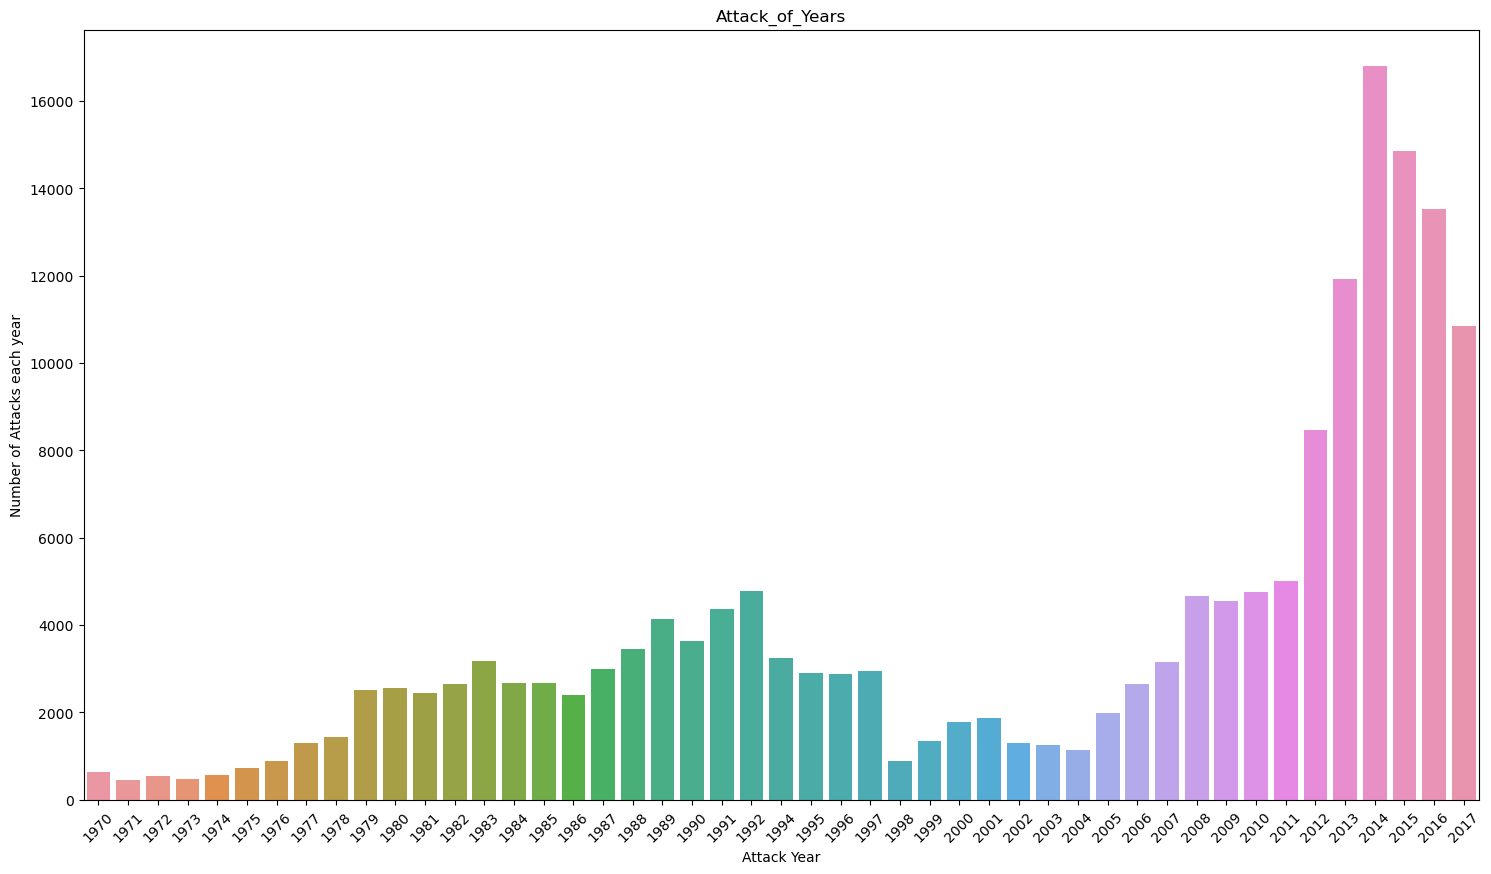

In [73]:
x_year = df['iyear'].unique()
y_count_years =df['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

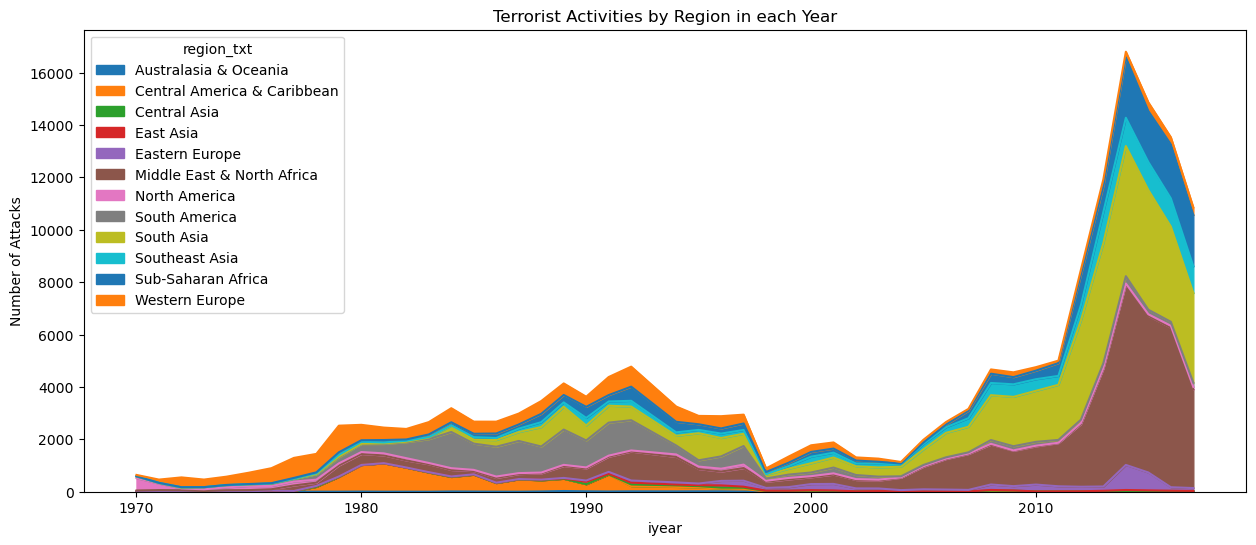

In [74]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [75]:
df.city.value_counts()[1:15]

Unknown         7519
Karachi         2651
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1580
San Salvador    1557
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

# Analyzing on Customized Data

In [86]:
df['attacktype1_txt']

1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
5                          Armed Assault
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: attacktype1_txt, Length: 176299, dtype: object

In [87]:
df.country_txt.unique()

array(['Mexico', 'Philippines', 'Greece', 'Japan', 'United States',
       'Uruguay', 'Italy', 'East Germany (GDR)', 'Guatemala', 'Venezuela',
       'West Germany (FRG)', 'Switzerland', 'Jordan', 'Brazil', 'Egypt',
       'Dominican Republic', 'Argentina', 'Lebanon', 'Ireland', 'Turkey',
       'Paraguay', 'Iran', 'United Kingdom', 'Colombia', 'Nicaragua',
       'Spain', 'Netherlands', 'Belgium', 'Canada', 'Australia',
       'Pakistan', 'Ethiopia', 'Sweden', 'Costa Rica', 'Bolivia',
       'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan', 'Panama',
       'West Bank and Gaza Strip', 'Austria', 'India', 'France',
       'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Afghanistan', 'Peru', 'Chile', 'Honduras', 'Yugoslavia',
       'Ecuador', 'New Zealand', 'Zambia', 'Malaysia', 'Singapore',
       'Botswana', 'Kuwait', 'Chad', 'North Yemen', 'Jama

In [89]:
import folium
from folium.plugins import MarkerCluster 
filterYear = df['iyear'] == 1970

In [91]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [94]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.
